# 1) Data Prediction:
## Choose 4 different methods of regression 
### a) linear regression
### b) polinominal regression

# Load the first dataset

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [11]:
input_file = 'Moneyball.csv'
Mb_data = pd.read_csv(input_file,  sep = ',', header = 0)
print(Mb_data)

     Team League  Year   RS   RA    W    OBP    SLG     BA  Playoffs  \
0     ARI     NL  2012  734  688   81  0.328  0.418  0.259         0   
1     ATL     NL  2012  700  600   94  0.320  0.389  0.247         1   
2     BAL     AL  2012  712  705   93  0.311  0.417  0.247         1   
3     BOS     AL  2012  734  806   69  0.315  0.415  0.260         0   
4     CHC     NL  2012  613  759   61  0.302  0.378  0.240         0   
...   ...    ...   ...  ...  ...  ...    ...    ...    ...       ...   
1227  PHI     NL  1962  705  759   81  0.330  0.390  0.260         0   
1228  PIT     NL  1962  706  626   93  0.321  0.394  0.268         0   
1229  SFG     NL  1962  878  690  103  0.341  0.441  0.278         1   
1230  STL     NL  1962  774  664   84  0.335  0.394  0.271         0   
1231  WSA     AL  1962  599  716   60  0.308  0.373  0.250         0   

     RankSeason RankPlayoffs    G   OOBP                 OSLG  
0             ?            ?  162  0.317                0.415  
1      

In [74]:
cols_to_drop = ['Team', 'League','Year', 'Playoffs', 'G','RankPlayoffs','RankSeason']
Mb_prep = Mb_data.drop(cols_to_drop, axis = 1)
Mb_prep.replace("?",0, inplace=True)
Mb_prep = Mb_prep[Mb_prep.OOBP != 0]
Mb_prep

,RS,RA,W,OBP,SLG,BA,OOBP,OSLG
0,734,688,81,0.328,0.418,0.259,0.317,0.415
1,700,600,94,0.320,0.389,0.247,0.306,0.37799999999999995
2,712,705,93,0.311,0.417,0.247,0.315,0.40299999999999997
3,734,806,69,0.315,0.415,0.260,0.331,0.428
4,613,759,61,0.302,0.378,0.240,0.335,0.424
...,...,...,...,...,...,...,...,...
415,872,831,86,0.356,0.434,0.271,0.345,0.423
416,809,838,75,0.338,0.426,0.262,0.355,0.42700000000000005
417,772,913,69,0.343,0.411,0.274,0.371,0.44799999999999995
418,945,859,95,0.361,0.479,0.293,0.34600000000000003,0.45899999999999996


In [ ]:
 	RS 	RA 	W 	OBP 	SLG 	BA 	OOBP 	OSLG

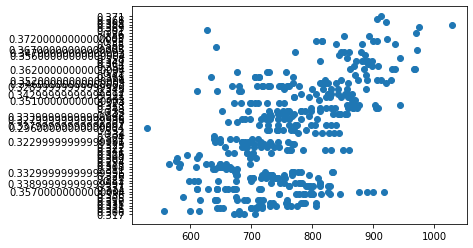

In [44]:
plt.scatter(Mb_prep.RA,Mb_prep.OOBP)

In [76]:
print(Mb_prep.OOBP)
test = Mb_prep['OOBP'].astype('float')
Mb_prep.insert(8, "OOBP_F", test, True)
print(Mb_prep)
#Mb_prep_df = pd.DataFrame(Mb_prep)
#Mb_prep_df
#pd.to_numeric(Mb_prep_df.OOBP)
#print(pd.to_numeric(Mb_prep_df.OOBP))
#Mb_target_df = pd.to_numeric(Mb_prep_df)
#Mb_target_df

0                    0.317
1                    0.306
2                    0.315
3                    0.331
4                    0.335
              ...         
415                  0.345
416                  0.355
417                  0.371
418    0.34600000000000003
419                  0.353
Name: OOBP, Length: 420, dtype: object
      RS   RA   W    OBP    SLG     BA                 OOBP  \
0    734  688  81  0.328  0.418  0.259                0.317   
1    700  600  94  0.320  0.389  0.247                0.306   
2    712  705  93  0.311  0.417  0.247                0.315   
3    734  806  69  0.315  0.415  0.260                0.331   
4    613  759  61  0.302  0.378  0.240                0.335   
..   ...  ...  ..    ...    ...    ...                  ...   
415  872  831  86  0.356  0.434  0.271                0.345   
416  809  838  75  0.338  0.426  0.262                0.355   
417  772  913  69  0.343  0.411  0.274                0.371   
418  945  859  95  0.361  0.479  0

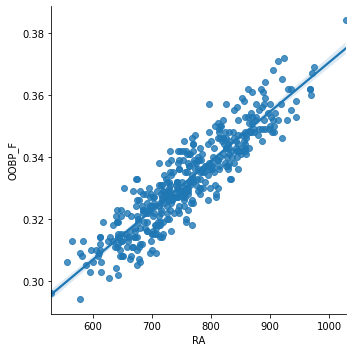

In [107]:
sns.lmplot("RA","OOBP_F",Mb_prep)

In [111]:
Y = Mb_prep[['OOBP_F']]
X = Mb_prep[['RA','RS']]

In [112]:
linreg = LinearRegression()
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
linreg.coef_
linreg.predict(X)
score = linreg.score(X,Y)
print(score)

0.8310311384848796
